In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
np.set_printoptions(linewidth=100000)

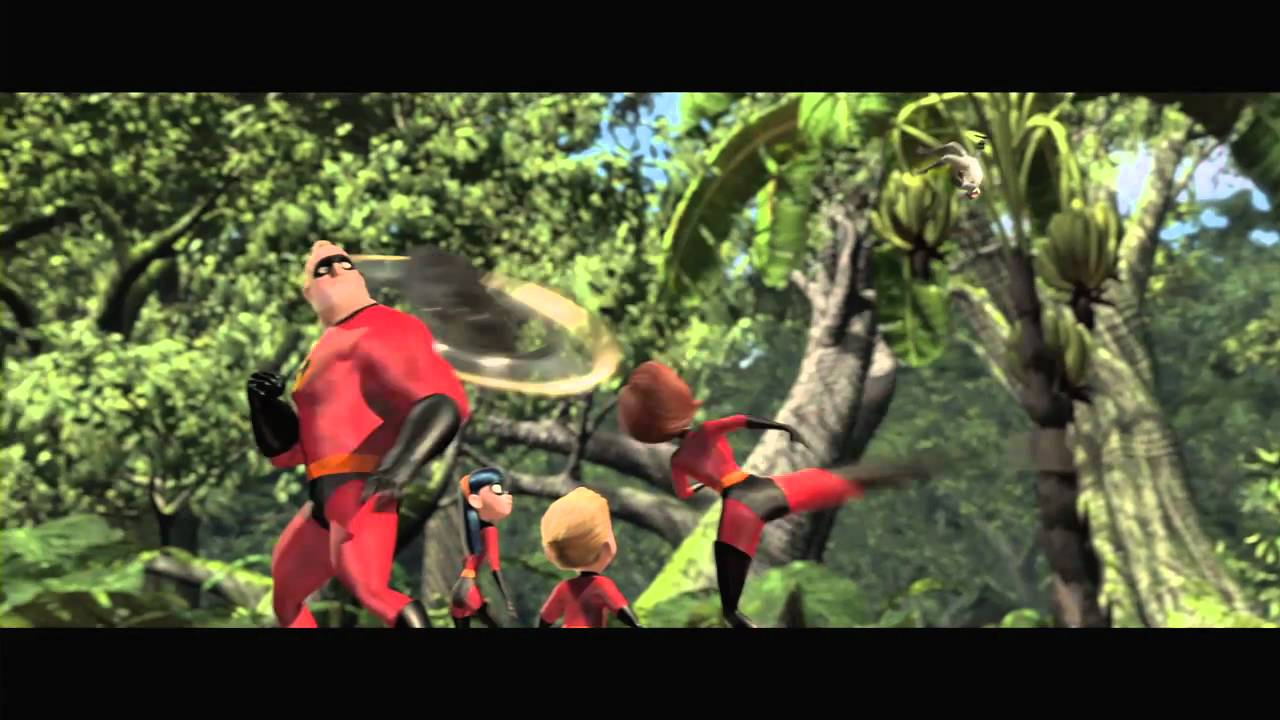

In [ ]:
img = cv2.imread('/content/drive/MyDrive/manufacturing_bigdata/03.deep_learning/workspace/inc_image/incredible_032.jpg')
cv2_imshow(img)

In [ ]:
img

In [ ]:
height, width, channels = img.shape

In [ ]:
height

720

In [ ]:
width

1280

In [ ]:
channels

3

In [ ]:
weight_path = '/content/drive/MyDrive/manufacturing_bigdata/03.deep_learning/workspace/yolov4_last.weights'
config_path = '/content/drive/MyDrive/manufacturing_bigdata/03.deep_learning/workspace/yolov4.cfg'

In [ ]:
net = cv2.dnn.readNetFromDarknet(config_path, weight_path)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

In [ ]:
net

< cv2.dnn.Net 0x7fecbbedad70>

In [ ]:
label_path = '/content/drive/MyDrive/manufacturing_bigdata/03.deep_learning/workspace/inc_names.txt'

In [ ]:
classes = []

with open(label_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [ ]:
classes

['mr_incredible', 'elastic_girl', 'dash', 'violet']

In [ ]:
layer_names = net.getLayerNames()
layer_names

In [ ]:
net.getUnconnectedOutLayers()

array([327, 353, 379], dtype=int32)

In [ ]:
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
output_layers

['yolo_139', 'yolo_150', 'yolo_161']

In [ ]:
blob = cv2.dnn.blobFromImage(img, 1/255, (608, 608), (0, 0, 0), True)
blob

In [ ]:
blob.shape

(1, 3, 608, 608)

In [ ]:
net.setInput(blob)

In [ ]:
outs = net.forward(output_layers)

In [ ]:
outs

In [ ]:
min_confidence = 0.5

class_ids = []
confidences = []
boxes = []

for layer_index, out in enumerate(outs):
    for detect_index, detection in enumerate(out):
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > min_confidence:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
len(boxes)

31

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)

In [ ]:
indexes

array([26, 12, 30, 23], dtype=int32)

In [ ]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))
colors

array([[184.9399649 , 116.47186301, 127.16993263],
       [222.37044223, 218.183301  , 220.81662567],
       [205.55449802,  68.20669422,   9.99533848],
       [202.08496291, 135.18014983,  40.76683373]])

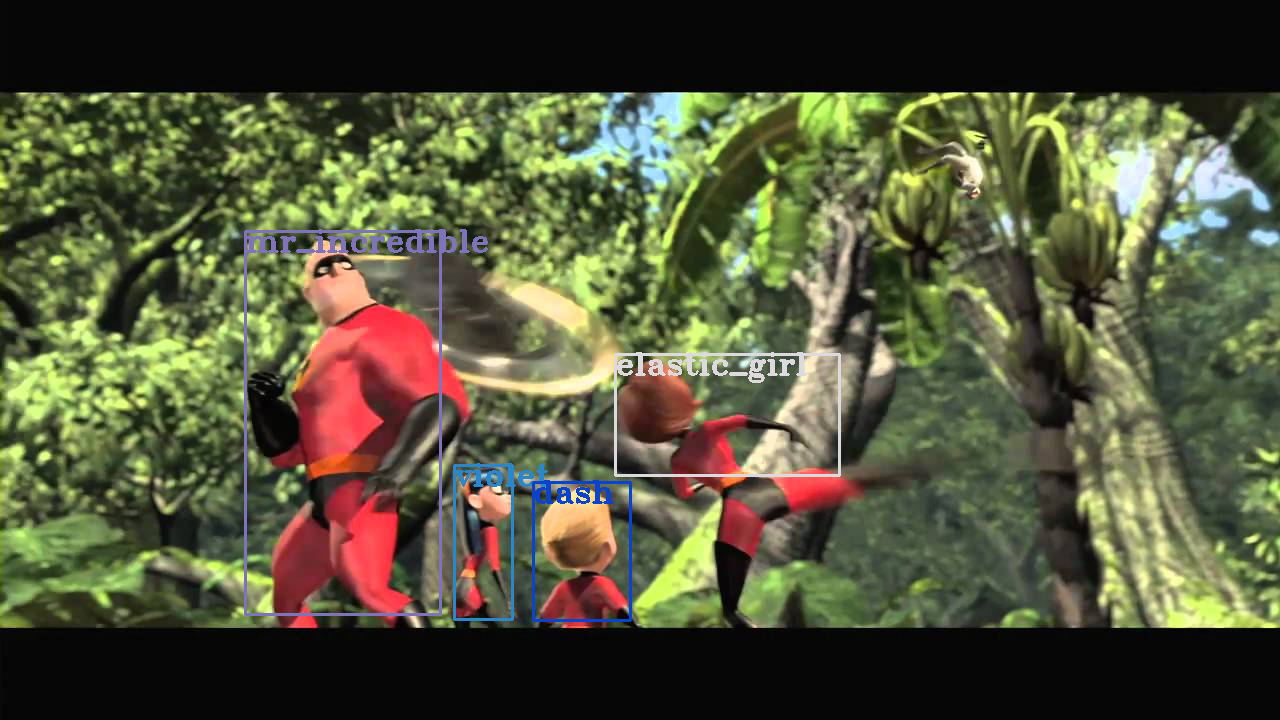

In [ ]:
for i in indexes:
    x, y, w, h = boxes[i]
    class_id = class_ids[i]
    label = str(classes[class_id])
    color = colors[class_id]

    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    cv2.putText(img, label, (x, y+20), cv2.FONT_HERSHEY_TRIPLEX, 1, color, 2)
cv2_imshow(img)